# <center> Build various CNN networks on MNIST dataset. </center>
___

###  <b>Exercise</b> :
1.	Use MNIST dataset, which is present in keras datasets.
2.	Also try 3-different convolution model, with 3,5 and 7 convolution layer.
3.	Try 3-different kernels like 3X3, 4X4 and 5X5 kernels.
4.	Also use dropout and batch normalization and plot train-test error vs epochs for each model.
5.	Write your observations in English as crisply and unambiguously as possible. Always quantify your results.



### Information regarding data set :

1. <b>Title</b>: MNIST database of handwritten digits 

2. <b>Sources</b>: Modified National Institute of Standards and Technology(MNIST)

3. <b>Relevant Information</b>: The MNIST database of handwritten digits, available from the page(http://yann.lecun.com/exdb/mnist/), has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image..

In [1]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# For plotting purposes
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from keras.utils import to_categorical
from keras.models import Sequential 
from keras.initializers import he_normal
from keras.layers import BatchNormalization, Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from keras import backend as K

# Import MNIST Dataset
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
# Load and split MNIST dataset
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [3]:
print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)
print("Number of training examples :", x_train.shape[0], "and each image is of shape (%d, %d)"%(x_train.shape[1], x_train.shape[2]))
print("Number of testing examples :", x_test.shape[0], "and each image is of shape (%d, %d)"%(x_test.shape[1], x_test.shape[2]))

x_train shape:  (60000, 28, 28)
x_test shape:  (10000, 28, 28)
Number of training examples : 60000 and each image is of shape (28, 28)
Number of testing examples : 10000 and each image is of shape (28, 28)


In [4]:
# Input image dimensions
image_rows, image_columns = 28, 28

# Number of target class labels
target_class_label_count = 10

# Input shape
input_shape = tuple()

if K.image_data_format() == 'channels_first':    
    # Theano dimension order
    x_train = x_train.reshape(x_train.shape[0], 1, image_rows, image_columns)
    x_test = x_test.reshape(x_test.shape[0], 1, image_rows, image_columns)
    input_shape = (1, image_rows, image_columns)
else:
    # TensorFlow dimension order
    x_train = x_train.reshape(x_train.shape[0], image_rows, image_columns, 1)
    x_test = x_test.reshape(x_test.shape[0], image_rows, image_columns, 1)
    input_shape = (image_rows, image_columns, 1)
    
print("Input shape: ",input_shape)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices
y_train = to_categorical(y_train,target_class_label_count)
y_test = to_categorical(y_test,target_class_label_count)

Input shape:  (28, 28, 1)
x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
60000 train samples
10000 test samples


In [5]:
# Plot train and cross validation loss
def plot_train_cv_loss(trained_model, epochs, colors=['b']):
    fig, ax = plt.subplots(1,1)    
    ax.set_xlabel('epoch') 
    ax.set_ylabel('Categorical Crossentropy Loss')
    x_axis_values = list(range(1,epochs+1))

    validation_loss = trained_model.history['val_loss']
    train_loss = trained_model.history['loss']   
    
    ax.plot(x_axis_values, validation_loss, 'b', label="Validation Loss")
    ax.plot(x_axis_values, train_loss, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()   


<br/>
<br/>
<br/>

#### Model 1 : with 3-Convolution Layer and 3X3 kernel

In [6]:
# Batch size 
batch_size = 128 

# Number of time whole data is trained
epochs = 15

# 3X3 kernel
kernel_3X3 = (3,3)

# 5X5 kernel
kernel_5X5 = (5,5)

# 7X7 kernel
kernel_7X7 = (7,7)

# 2X2 max pool
max_pool_2X2 = (2,2)

# 3X3 max pool
max_pool_3X3 = (3,3)

# 4X4 max pool
max_pool_4X4 = (4,4)

In [7]:
# Instantiate sequential model
model = Sequential()

# Add 1st hidden layer : Convolution Layer 1
conv_layer1 = Conv2D(32,
                         kernel_size=kernel_3X3,
                         activation="relu",
                         input_shape=input_shape)
model.add(conv_layer1)

# Add batch normalization
model.add(BatchNormalization())

# Add dropout
model.add(Dropout(0.25))


# Add 2nd hidden layer : Convolution Layer 2
conv_layer2 = Conv2D(64,
                        kernel_size=kernel_3X3,
                        activation="relu")
model.add(conv_layer2)

# Add max pooling layer
model.add(MaxPooling2D(pool_size=max_pool_2X2))

# Add dropout
model.add(Dropout(0.50))

# Add 3rd hidden layer : Convolution Layer 3
conv_layer3 = Conv2D(128,
                        kernel_size=kernel_3X3,
                        activation="relu")
model.add(conv_layer3)

# Add max pooling layer
model.add(MaxPooling2D(pool_size=max_pool_2X2))

# Add dropout
model.add(Dropout(0.25))

# Convert data to 1-D array and perform normal MLP
model.add(Flatten())

# Convert to dense layer
model.add(Dense(128, activation='relu'))

# Output layer
model.add(Dense(target_class_label_count, activation='softmax'))


# Summary of the model
print("Model Summary: \n")
model.summary()
print()
print()

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Run the model
trained_model = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, verbose=1, validation_data=(x_test, y_test))

Model Summary: 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 128)       7385

In [8]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy: {0:.2f}%'.format(score[1]*100))

Test score: 0.021964074645725123
Test accuracy: 99.35%


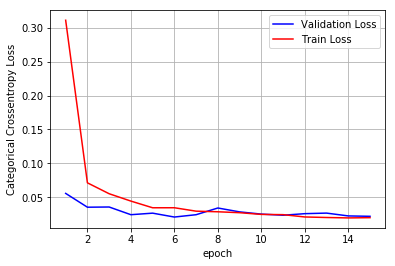

In [9]:
print()
print()

# Plot train and cross validation error
plot_train_cv_loss(trained_model, epochs)

<br/>

#### On 13th epoch we find that validation error and train error comes together and then after follows the same path, so best value for epoch is between 13-14

</br>
</br>

#### Model 2 : with 5-Convolution Layer and 5X5 kernel

In [10]:
%%time

# Instantiate sequential model
model = Sequential()

# Add 1st hidden layer : Convolution Layer 1
conv_layer1 = Conv2D(16,                       
                         kernel_size=kernel_5X5,
                         activation="relu",
                         input_shape=input_shape,
                         kernel_initializer='he_normal')
model.add(conv_layer1)
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=max_pool_3X3,strides=(1,1),padding="same"))
model.add(Dropout(0.25))


# Add 2nd hidden layer : Convolution Layer 2
conv_layer2 = Conv2D(32,                        
                        kernel_size=kernel_5X5,
                        activation="relu",
                        kernel_initializer='he_normal')
model.add(conv_layer2)
model.add(MaxPooling2D(pool_size=max_pool_3X3,strides=(1,1),padding="same"))
model.add(Dropout(0.25))


# Add 3rd hidden layer : Convolution Layer 3
conv_layer3 = Conv2D(64,                        
                        kernel_size=kernel_5X5,
                        activation="relu",
                        kernel_initializer='he_normal')
model.add(conv_layer3)
model.add(MaxPooling2D(pool_size=max_pool_3X3,strides=(1,1),padding="same"))
model.add(Dropout(0.25))

# Add 4th hidden layer : Convolution Layer 4
conv_layer4 = Conv2D(128,                        
                        kernel_size=kernel_5X5,
                        activation="relu",
                        kernel_initializer='he_normal')
model.add(conv_layer4)
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=max_pool_3X3,strides=(1,1),padding="same"))
model.add(Dropout(0.50))


# Add 5th hidden layer : Convolution Layer 5
conv_layer5 = Conv2D(256,                        
                        kernel_size=kernel_5X5,
                        activation="relu",
                        kernel_initializer='he_normal')
model.add(conv_layer5)
model.add(MaxPooling2D(pool_size=max_pool_3X3,strides=(1,1),padding="same"))
model.add(Dropout(0.50))


# Convert data to 1-D array and perform normal MLP
model.add(Flatten())

# Convert to dense layer
model.add(Dense(260, activation='relu'))

# Convert to dense layer
model.add(Dense(130, activation='relu'))

# Add batch normalization
model.add(BatchNormalization())

# Add dropout
model.add(Dropout(0.50))

# Output layer
model.add(Dense(target_class_label_count, activation='softmax'))


# Summary of the model
print("Model Summary: \n")
model.summary()
print()
print()

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Run the model
trained_model = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, verbose=1, validation_data=(x_test, y_test))

Model Summary: 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 24, 24, 16)        416       
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 24, 24, 16)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 20, 20, 32)        12832     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 20, 20, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 20, 20, 32)        0   

In [11]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy: {0:.2f}%'.format(score[1]*100))

Test score: 0.024988538761119707
Test accuracy: 99.40%


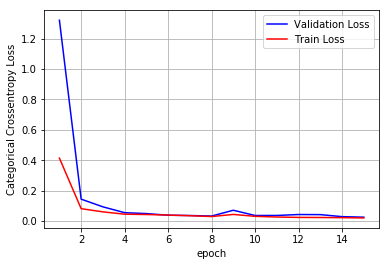

In [12]:
# Plot train and cross validation error
plot_train_cv_loss(trained_model, epochs)

<br/>

#### On 4th epoch we find that validation error and train error comes together, so best value for epoch is between 2-4

<br/>
<br/>

#### Model 3 : with 7-Convolution Layer and 7X7 kernel

In [19]:
%%time
batch_size = 256

# Instantiate sequential model
model = Sequential()

# Add 1st hidden layer : Convolution Layer 1
conv_layer1 = Conv2D(8,
                         kernel_size=kernel_7X7,
                         activation="relu",
                         kernel_initializer='he_normal',
                         input_shape=input_shape)
model.add(conv_layer1)
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=max_pool_4X4,strides=(1,1),padding="same"))
model.add(Dropout(0.25))


# Add 2nd hidden layer : Convolution Layer 2
conv_layer2 = Conv2D(16,                        
                        kernel_size=kernel_7X7,
                        kernel_initializer='he_normal',
                        activation="relu")
model.add(conv_layer2)
model.add(MaxPooling2D(pool_size=max_pool_4X4,strides=(1,1),padding="same"))
model.add(Dropout(0.25))


# Add 3rd hidden layer : Convolution Layer 3
conv_layer3 = Conv2D(32,                        
                        kernel_size=kernel_7X7,
                        kernel_initializer='he_normal',
                        activation="relu")
model.add(conv_layer3)
model.add(MaxPooling2D(pool_size=max_pool_4X4,strides=(1,1),padding="same"))
model.add(Dropout(0.25))

# Add 4th hidden layer : Convolution Layer 4
conv_layer4 = Conv2D(64,
                        padding="same",
                        kernel_size=kernel_7X7,
                        kernel_initializer='he_normal',
                        activation="relu")
model.add(conv_layer4)
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=max_pool_4X4,strides=(1,1),padding="same"))
model.add(Dropout(0.25))


# Add 5th hidden layer : Convolution Layer 5
conv_layer5 = Conv2D(128,
                        padding="same",
                        kernel_size=kernel_7X7,
                        kernel_initializer='he_normal',
                        activation="relu")
model.add(conv_layer5)
model.add(MaxPooling2D(pool_size=max_pool_4X4,strides=(1,1),padding="same"))
model.add(Dropout(0.25))

# Add 6th hidden layer : Convolution Layer 6
conv_layer6 = Conv2D(256,
                        padding="same",
                        kernel_size=kernel_7X7,
                        kernel_initializer='he_normal',
                        activation="relu")
model.add(conv_layer6)
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=max_pool_4X4,strides=(1,1),padding="same"))
model.add(Dropout(0.50))

# Add 7th hidden layer : Convolution Layer 7
conv_layer7 = Conv2D(512,                        
                        kernel_size=kernel_7X7,
                        kernel_initializer='he_normal',
                        activation="relu")
model.add(conv_layer7)
model.add(MaxPooling2D(pool_size=max_pool_4X4,strides=(1,1),padding="same"))
model.add(Dropout(0.50))


# Convert data to 1-D array and perform normal MLP
model.add(Flatten())

# Convert to dense layer
model.add(Dense(520, activation='relu'))

# Convert to dense layer
model.add(Dense(250, activation='relu'))

# Convert to dense layer
model.add(Dense(125, activation='relu'))

# Add batch normalization
model.add(BatchNormalization())

# Add dropout
model.add(Dropout(0.50))

# Output layer
model.add(Dense(target_class_label_count, activation='softmax'))


# Summary of the model
print("Model Summary: \n")
model.summary()
print()
print()

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Run the model
trained_model = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, verbose=1, validation_data=(x_test, y_test))

Model Summary: 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 22, 22, 8)         400       
_________________________________________________________________
batch_normalization_12 (Batc (None, 22, 22, 8)         32        
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 22, 22, 8)         0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 22, 22, 8)         0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 16, 16, 16)        6288      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
dropout_26 (Dropout)         (None, 16, 16, 16)        0   

In [20]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy: {0:.2f}%'.format(score[1]*100))

Test score: 0.041122954766452315
Test accuracy: 98.91%


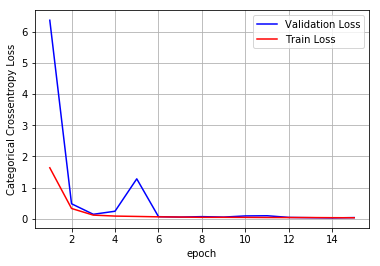

In [21]:
# Plot train and cross validation error
plot_train_cv_loss(trained_model, epochs)

<br/>

#### On 6th epoch we find that validation error and train error comes together, and then after follows the same path.

<br/>
<br/>

---
### Observations :
---

> 1. Tried different CNN architectures on MNIST dataset.
> 2. 'Relu' is used as an activation function to develop deep CNN network. 
> 3. 'Adam' is used as an optimizer to develop deep CNN network. 
> 4. Introduced batch normalization, max-pooling and dropout in between hidden layers.
> 5. Got 99.35, 99.40 and 98.91 accuracies for 2,3 and 5 hidden layers.
> 6. Optimal epoch values are also calculated to avoid overfitting.